In [2]:
import os
import pandas as pd
import re

from typing import List, Dict
import natsort


In [3]:
csv_list: List[str] = os.listdir('./results/analysis/csv/')
csv_list = [csv for csv in csv_list if re.search('\.csv$', csv)]
csv_list = [csv.removesuffix('.csv') for csv in csv_list]
csv_list = natsort.natsorted(csv_list)
len(csv_list)

FileNotFoundError: [Errno 2] No such file or directory: './results/analysis/csv/'

In [ ]:
forest_file_list: List[str] = [x for x in csv_list if 'forest' in x]

forest_criterion_list = [x for x in forest_file_list if 'criterion' in x]
forest_depth_list = [x for x in forest_file_list if 'depth' in x]
forest_estimator_list = [x for x in forest_file_list if 'estimators' in x]
forest_file_list

['forest_criterion_entropy',
 'forest_criterion_gini',
 'forest_criterion_log_loss',
 'forest_depth_5',
 'forest_depth_10',
 'forest_depth_Any',
 'forest_num_estimators_1',
 'forest_num_estimators_25',
 'forest_num_estimators_50',
 'forest_num_estimators_100']

In [ ]:
svm_list: List[str] = [x for x in csv_list if 'svm' in x and not 'pca' in x]

svm_C_list = [x for x in svm_list if 'C_' in x]
svm_gamma_list = [x for x in svm_list if 'gamma' in x]
svm_kernel_list = [x for x in svm_list if 'kernel' in x]

svm_list

['svm_C_1',
 'svm_C_2',
 'svm_C_3',
 'svm_C_4',
 'svm_gamma_0.1',
 'svm_gamma_0.5',
 'svm_gamma_1.0',
 'svm_gamma_scale',
 'svm_kernel_linear',
 'svm_kernel_poly',
 'svm_kernel_sigmoid']

In [ ]:
pca_list: List[str] = [x for x in csv_list if 'svm' in x and 'pca' in x]

pca_linear_list = [x for x in pca_list if 'linear' in x]
pca_poly_list = [x for x in pca_list if 'poly' in x]
pca_sigmoid_list = [x for x in pca_list if 'sigmoid' in x]

pca_list

['pca_1_svm_kernel_linear',
 'pca_1_svm_kernel_poly',
 'pca_1_svm_kernel_sigmoid',
 'pca_3_svm_kernel_linear',
 'pca_3_svm_kernel_poly',
 'pca_3_svm_kernel_sigmoid',
 'pca_5_svm_kernel_linear',
 'pca_5_svm_kernel_poly',
 'pca_5_svm_kernel_sigmoid',
 'pca_10_svm_kernel_linear',
 'pca_10_svm_kernel_poly',
 'pca_10_svm_kernel_sigmoid',
 'pca_15_svm_kernel_linear',
 'pca_15_svm_kernel_poly',
 'pca_15_svm_kernel_sigmoid']

In [ ]:
best_forest_estimator_list: List[str] = ['forest_criterion_gini', 'forest_depth_Any', 'forest_num_estimators_50']
best_svm_estimator_list: List[str] = ['svm_gamma_scale', 'svm_gamma_0.1']
best_pca_estimator_list: List[str] = ['pca_10_svm_kernel_linear', 'pca_10_svm_kernel_poly', 'pca_10_svm_kernel_sigmoid']

In [ ]:
# sanity check
len(forest_file_list) + len(svm_list) + len(pca_list)

36

In [ ]:
df_dict: Dict[str, pd.DataFrame] = {key: pd.read_csv(f'./results/analysis/csv/{key}.csv', index_col=0) for key in csv_list}

In [ ]:
def get_estimator_accuracy_df(estimator_list: List[str]) -> pd.DataFrame:
    estimator_df = pd.DataFrame()

    for file_name in estimator_list:
        current_df = df_dict[file_name]
        current_df = current_df['accuracy'].to_frame().transpose()
        current_df.index = [file_name]
        
        estimator_df = pd.concat([estimator_df, current_df])
        
    return estimator_df

get_estimator_accuracy_df(forest_file_list)

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000
forest_criterion_entropy,0.898,0.899,0.893333,0.9080,0.9120,0.922667,0.929143,0.92950,0.927556,0.9284,0.935636,0.940833,0.940462,0.943286,0.948133,0.951125,0.953765,0.956778,0.957368,0.9586
forest_criterion_gini,0.900,0.897,0.890667,0.9100,0.9184,0.928333,0.930571,0.92575,0.933778,0.9314,0.935091,0.943500,0.942769,0.946000,0.949467,0.952625,0.954118,0.957444,0.960842,0.9591
forest_criterion_log_loss,0.882,0.891,0.900000,0.9075,0.9116,0.921000,0.924286,0.92525,0.927333,0.9322,0.938364,0.942167,0.942615,0.943857,0.949200,0.950125,0.956000,0.955556,0.958526,0.9593
forest_depth_5,0.834,0.831,0.810667,0.8225,0.8240,0.825667,0.824000,0.82000,0.817778,0.8306,0.837636,0.837833,0.847538,0.844429,0.849733,0.854875,0.857647,0.861333,0.863263,0.8628
forest_depth_10,0.884,0.894,0.886667,0.9040,0.9000,0.916000,0.913429,0.91675,0.917333,0.9168,0.924182,0.925333,0.928462,0.929429,0.933333,0.934625,0.940000,0.943222,0.944000,0.9437
forest_depth_Any,0.894,0.892,0.894000,0.9020,0.9120,0.925333,0.934000,0.92800,0.928000,0.9290,0.938000,0.940833,0.944308,0.946714,0.950400,0.951375,0.953294,0.957556,0.959474,0.9594
forest_num_estimators_1,0.514,0.608,0.614667,0.6425,0.6704,0.684667,0.670571,0.68325,0.697333,0.6982,0.706545,0.724500,0.748462,0.747857,0.743200,0.767375,0.760000,0.759556,0.779368,0.7714
forest_num_estimators_25,0.856,0.874,0.880000,0.8920,0.8992,0.904000,0.907429,0.90500,0.912000,0.9204,0.925818,0.924500,0.932769,0.935429,0.935333,0.939625,0.942941,0.946111,0.948737,0.9484
forest_num_estimators_50,0.892,0.876,0.886000,0.9050,0.9020,0.918667,0.924571,0.92200,0.923111,0.9284,0.933273,0.938833,0.942462,0.942429,0.945467,0.946375,0.950824,0.956111,0.957474,0.9555
forest_num_estimators_100,0.886,0.895,0.896667,0.9080,0.9156,0.923667,0.928000,0.92700,0.931333,0.9254,0.934000,0.940667,0.941846,0.946429,0.951333,0.951750,0.954000,0.956778,0.959053,0.9590


In [4]:
def get_estimator_time_df(estimator_list: List[str], train_time: bool = True) -> pd.DataFrame:
    estimator_df = pd.DataFrame()
    
    time_column: str = 'train time' if train_time else 'predict time'

    for file_name in estimator_list:
        current_df = df_dict[file_name]
        current_df = current_df[time_column].to_frame().transpose()
        current_df.index = [file_name]
        
        estimator_df = pd.concat([estimator_df, current_df])
        
    if train_time is False:
        column_dict = {x: x // 2 for x in estimator_df.columns}
        estimator_df.rename(columns=column_dict, inplace=True)
        
    return estimator_df

get_estimator_time_df(svm_list)


NameError: name 'svm_list' is not defined

In [132]:
get_estimator_time_df(forest_criterion_list, False)

,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000
forest_criterion_entropy,0.007638,0.013757,0.019965,0.026403,0.033400,0.042223,0.050104,0.055811,0.062958,0.069510,0.079665,0.080857,0.088481,0.094576,0.101154,0.110935,0.114877,0.121087,0.131650,0.138126
forest_criterion_gini,0.008146,0.014443,0.019696,0.024860,0.032046,0.042456,0.050838,0.053771,0.062066,0.070700,0.076069,0.081385,0.089535,0.100384,0.105134,0.109974,0.121195,0.122113,0.132513,0.145849
forest_criterion_log_loss,0.007736,0.013842,0.019232,0.025159,0.034779,0.039519,0.049975,0.052234,0.062549,0.067926,0.076544,0.082864,0.091249,0.094941,0.104700,0.108086,0.118347,0.122236,0.133913,0.140827


In [133]:
def plot_dataframe(df: pd.DataFrame, y_label: str = '', file_name: str = None, train_time: bool = True) -> None:
    
    x_label: str = 'Train Size' if train_time else 'Test Size'
    
    df_plot = df.transpose().plot.line()
    df_plot.set_xlabel(x_label)
    df_plot.set_ylabel(y_label)
    df_plot.grid()
    
    if file_name is not None:
        df_plot.figure.savefig(f'./results/analysis/figures/{file_name}.png')
    
        

In [134]:
def plot_acc_time(estimator_list: List[str], file_name: str = None):
    acc_df = get_estimator_accuracy_df(estimator_list)
    train_time_df = get_estimator_time_df(estimator_list, train_time=True)
    predict_time_df = get_estimator_time_df(estimator_list, train_time=False)
    
    acc_file_name = file_name + '_accuracy' if file_name is not None else None
    train_time_file_name = file_name + '_train_time' if file_name is not None else None
    predict_time_file_name = file_name + '_predict_time' if file_name is not None else None

    plot_dataframe(acc_df, 'Accuracy', acc_file_name)
    plot_dataframe(train_time_df, 'Time in Seconds', train_time_file_name)
    plot_dataframe(predict_time_df, 'Time in Seconds', predict_time_file_name, train_time=False)
    

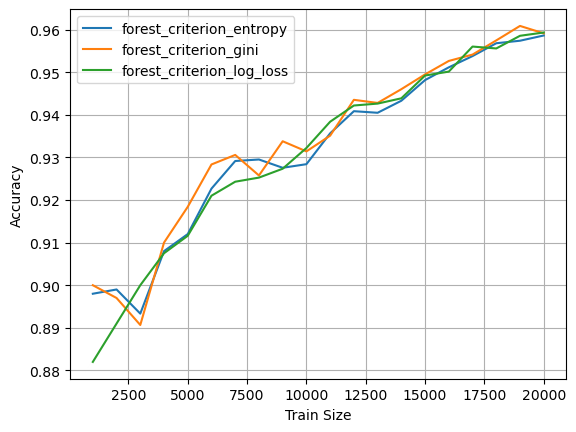

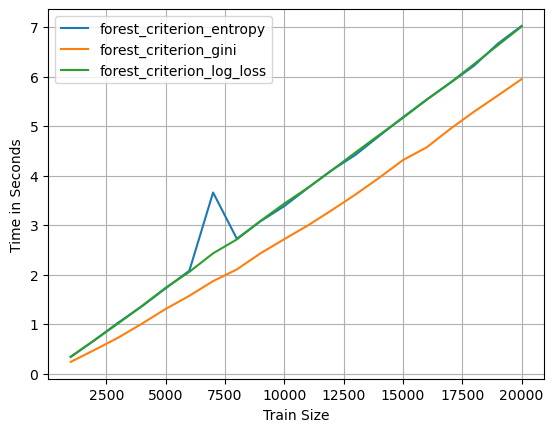

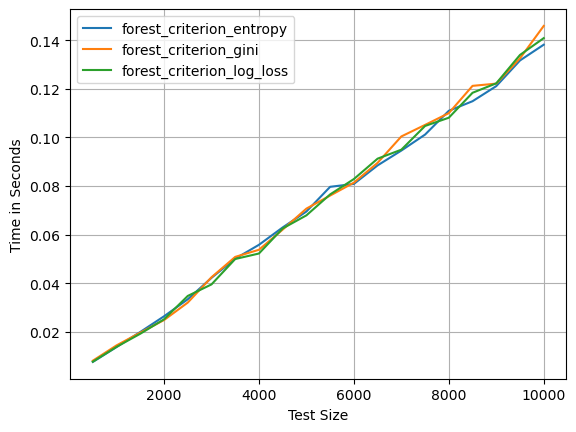

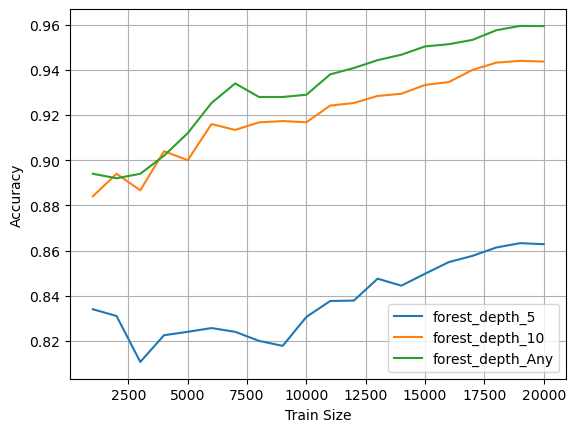

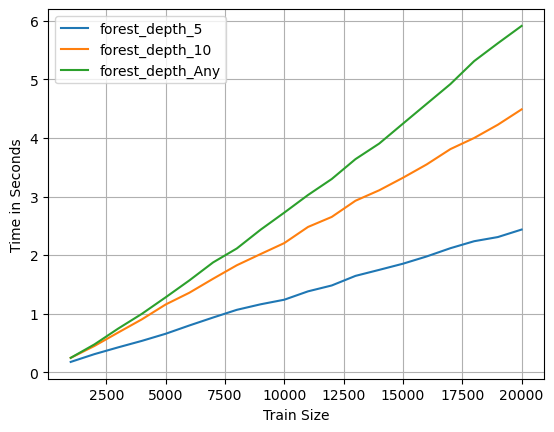

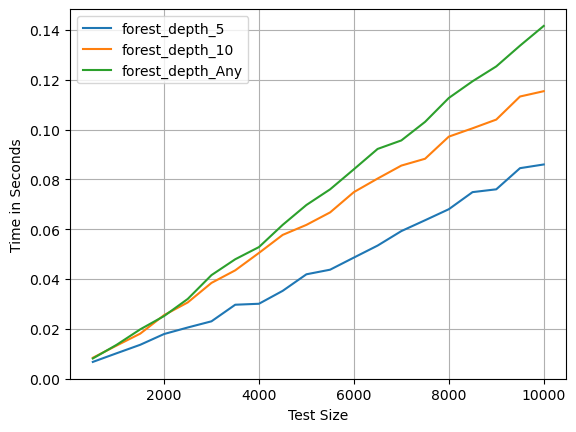

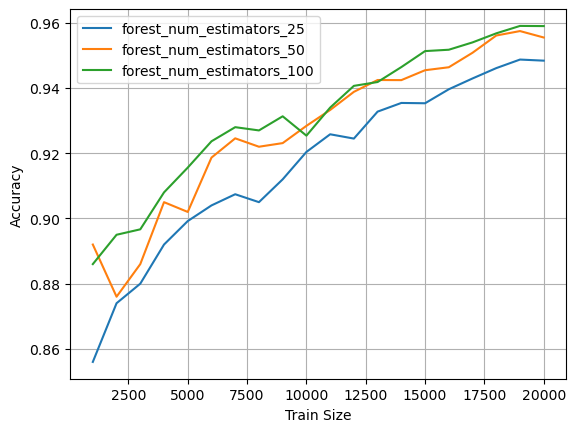

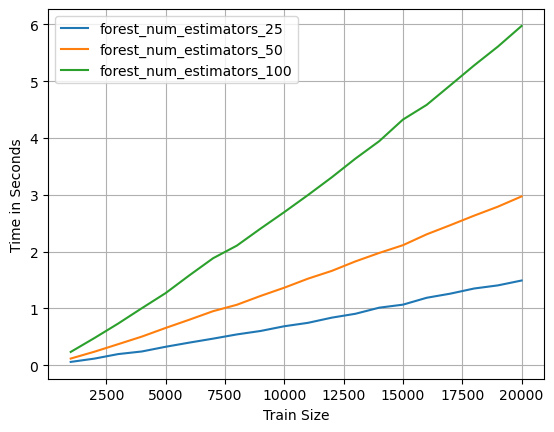

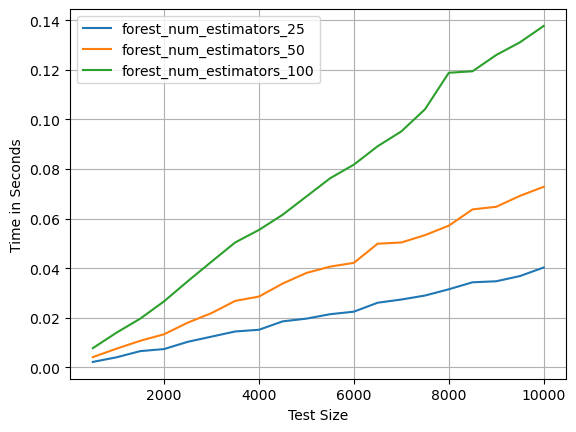

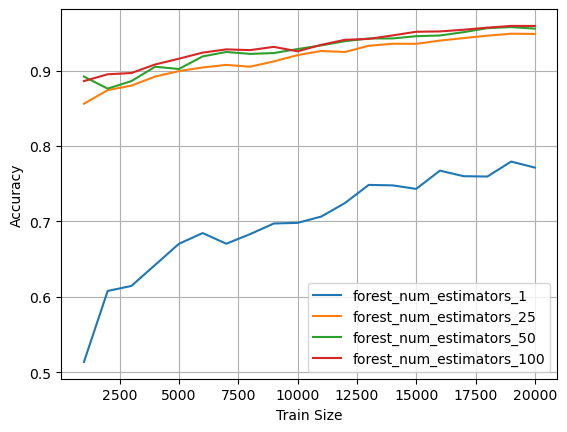

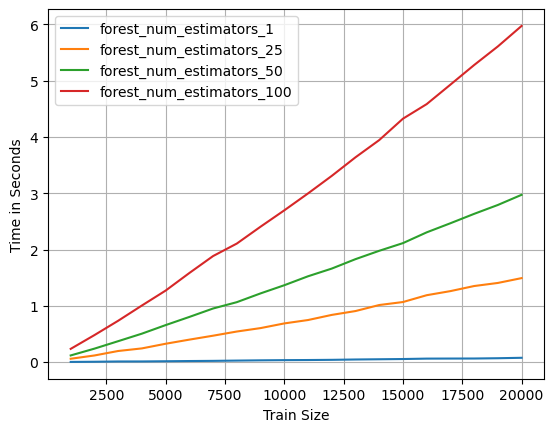

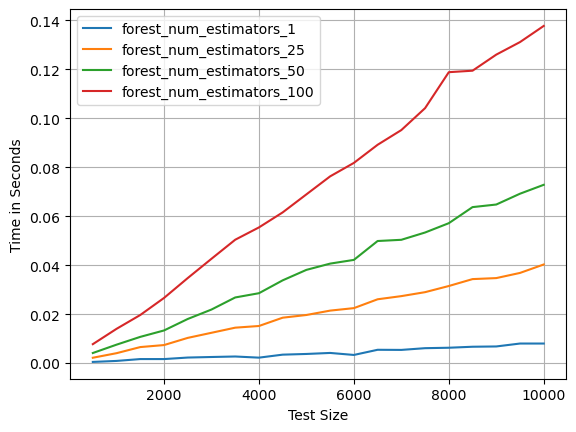

In [135]:
plot_acc_time(forest_criterion_list, 'forest_criterion')
plot_acc_time(forest_depth_list, 'forest_depth')
plot_acc_time(forest_estimator_list[1:], 'forest_num_estimator_best')
plot_acc_time(forest_estimator_list, 'forest_num_estimator')

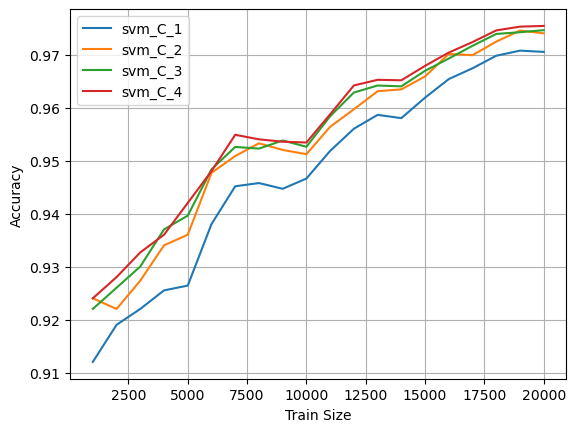

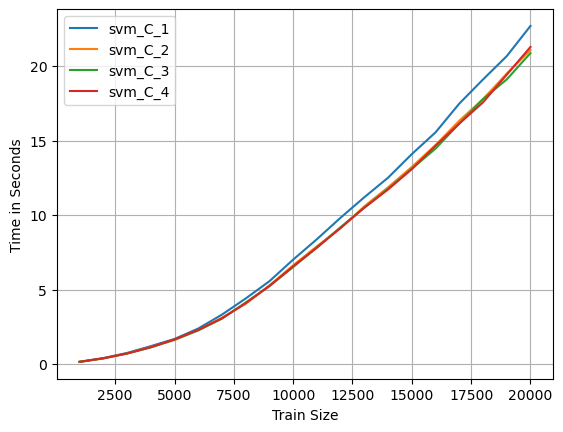

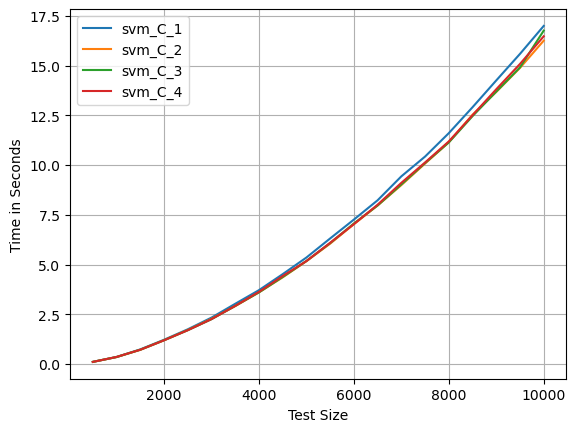

In [136]:
plot_acc_time(svm_C_list, 'svm_C')


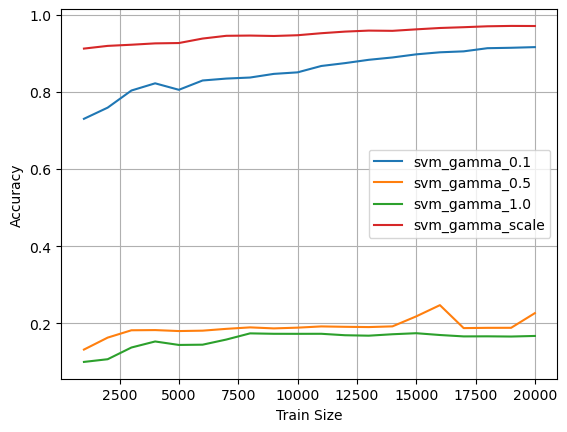

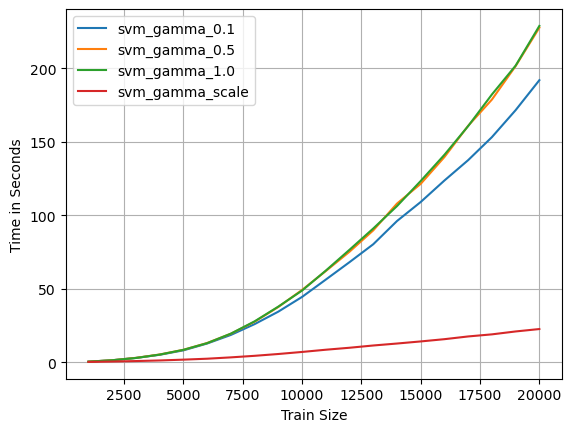

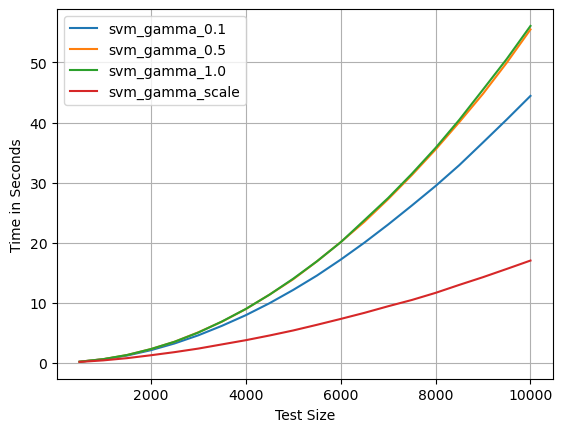

In [137]:
plot_acc_time(svm_gamma_list, 'svm_gamma')

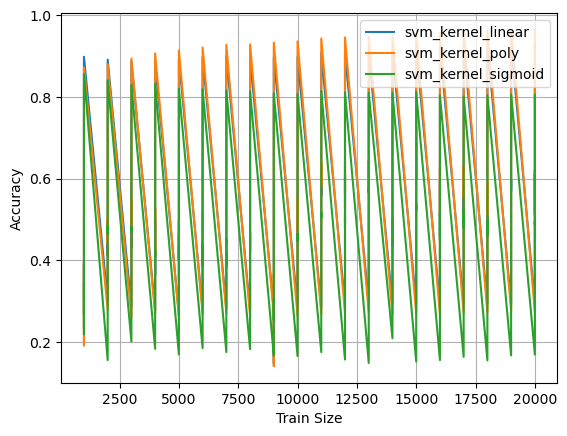

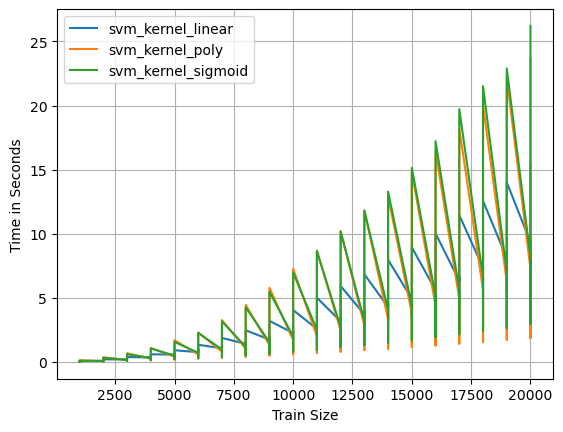

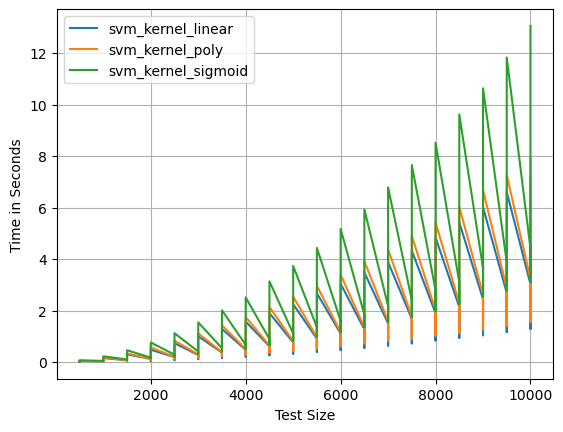

In [138]:

plot_acc_time(svm_kernel_list, 'svm_kernel')

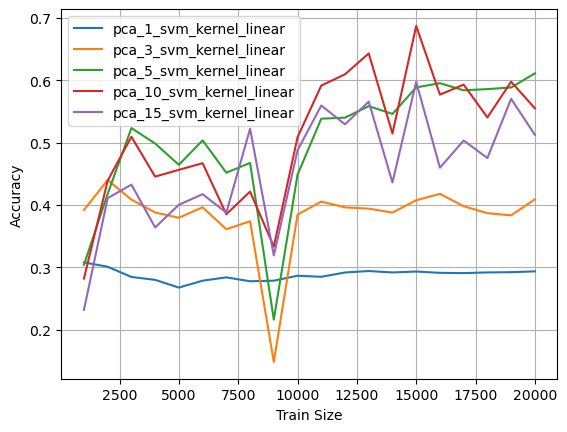

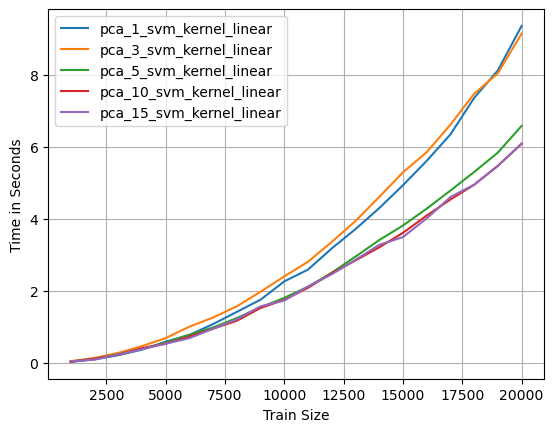

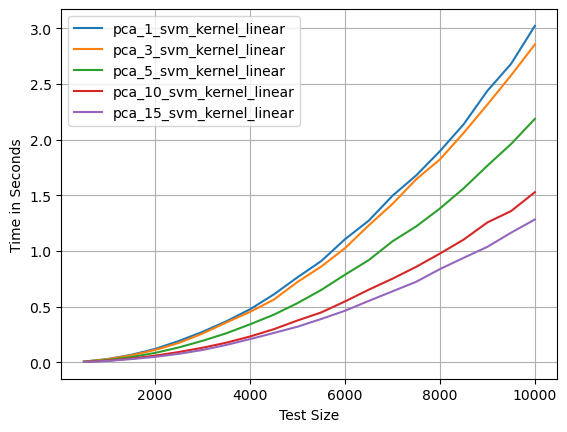

In [139]:
plot_acc_time(pca_linear_list, 'pca_linear_kernel')


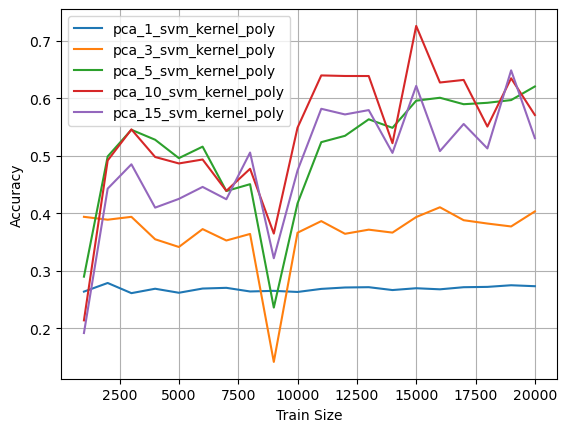

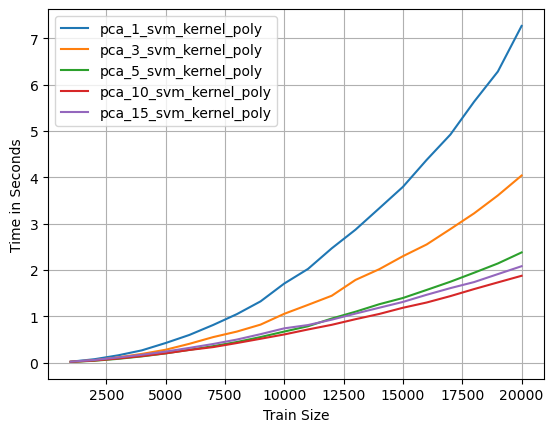

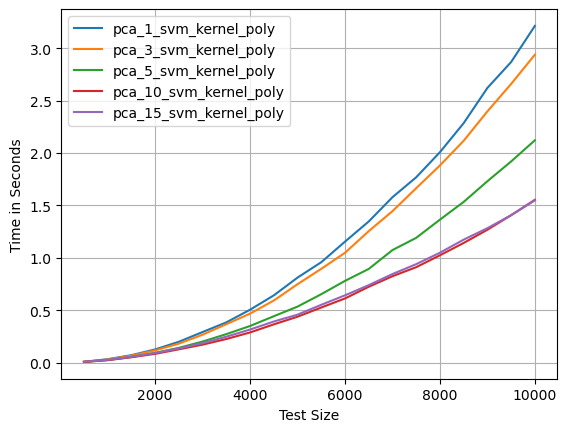

In [140]:
plot_acc_time(pca_poly_list, 'pca_poly_kernel')

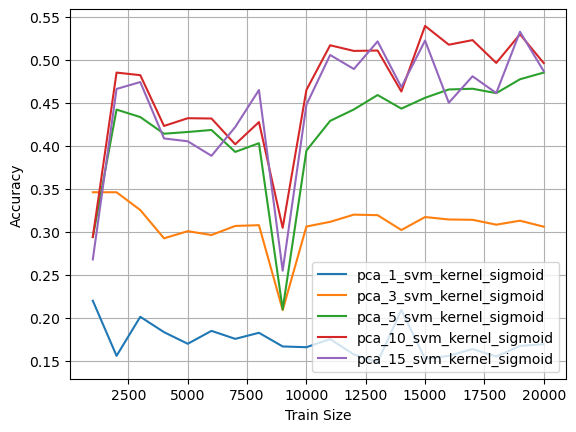

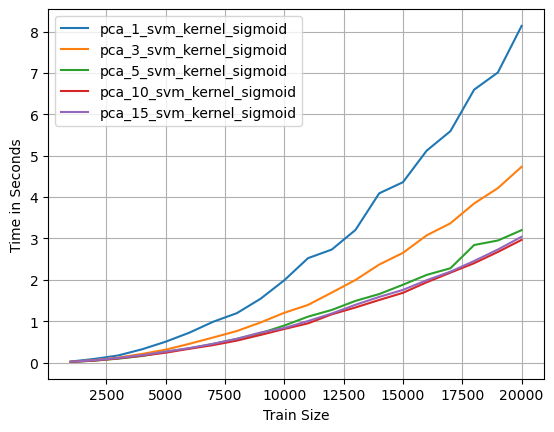

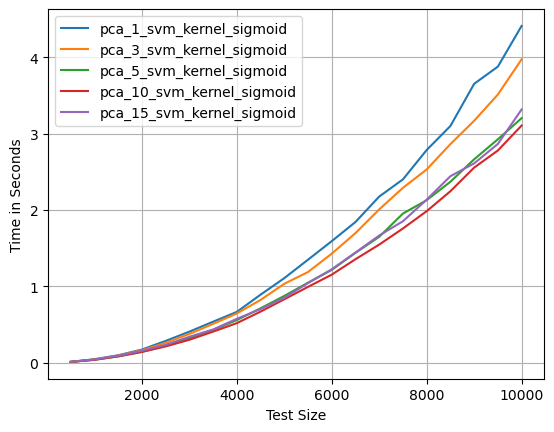

In [141]:
plot_acc_time(pca_sigmoid_list, 'pca_sigmoid_kernel')

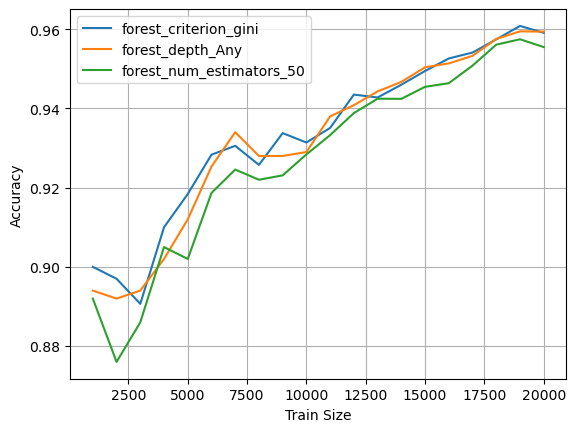

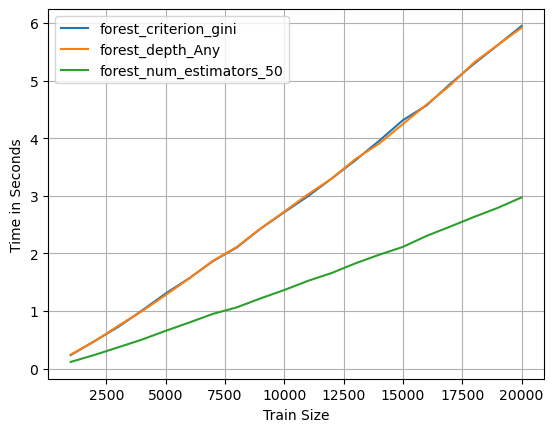

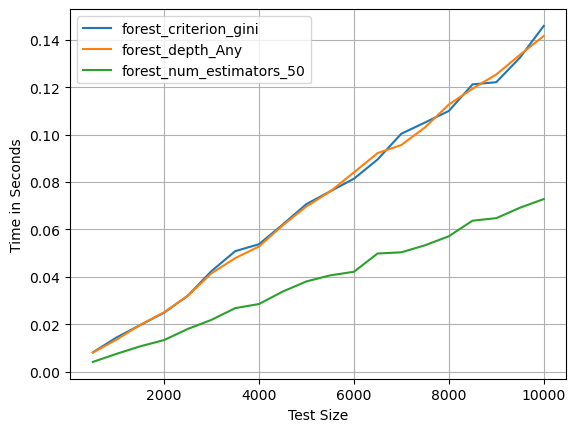

In [142]:
plot_acc_time(best_forest_estimator_list, 'best_forest_estimators')

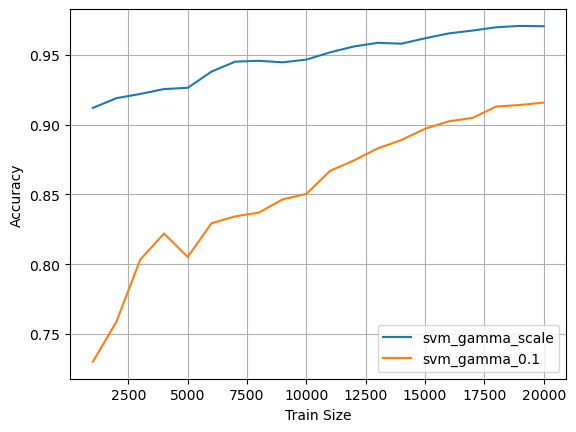

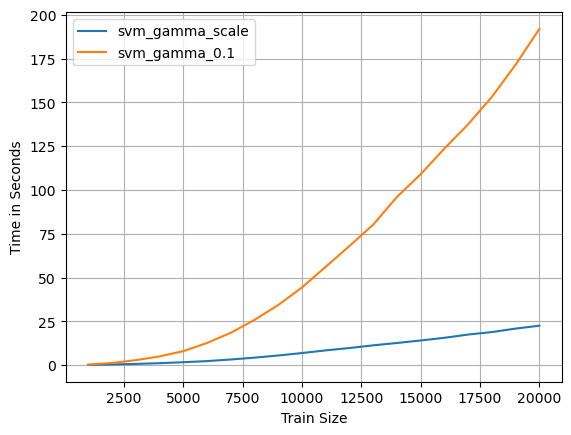

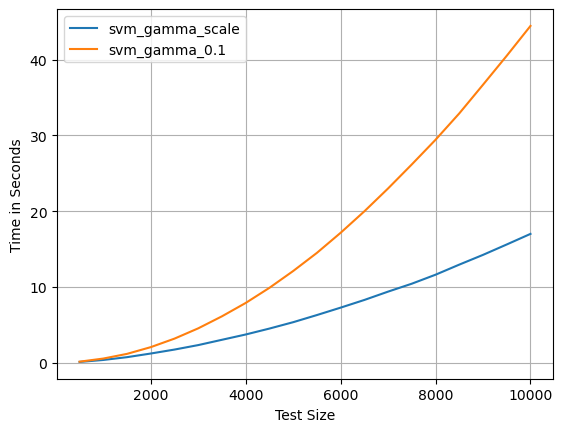

In [143]:
plot_acc_time(best_svm_estimator_list, 'best_svm_estimators')

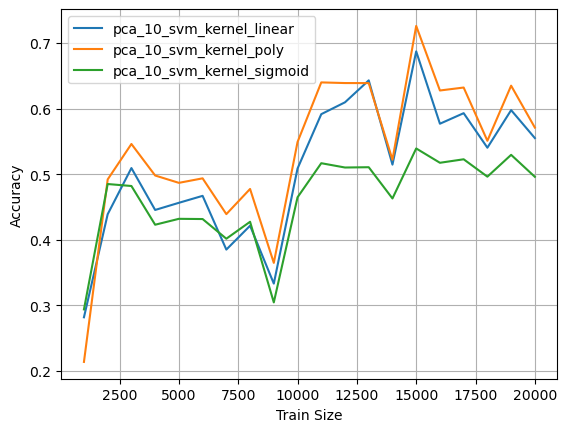

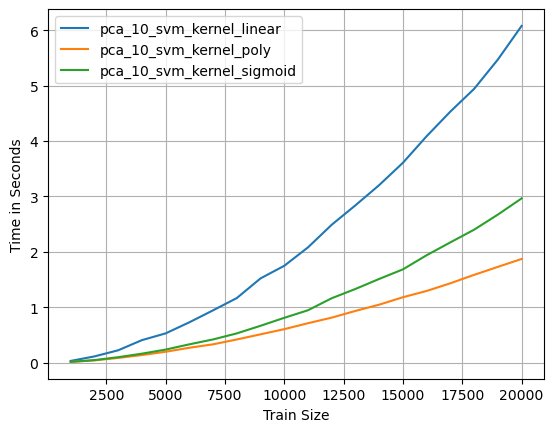

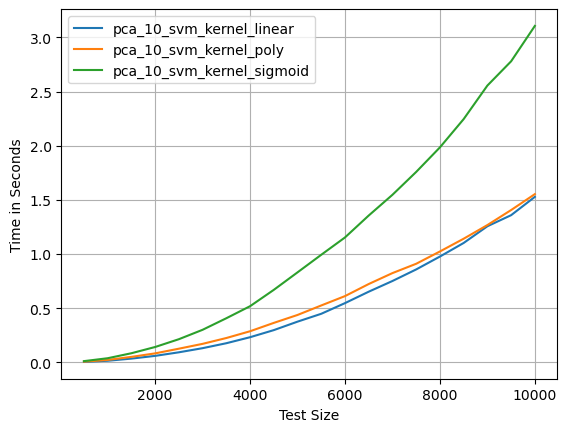

In [144]:
plot_acc_time(best_pca_estimator_list, 'best_pca_estimators')

In [145]:
best_estimator_each_class = ['forest_num_estimators_50', 'svm_gamma_scale', 'pca_10_svm_kernel_linear']

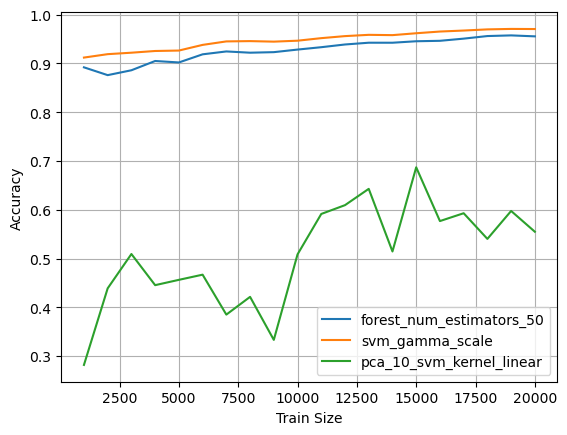

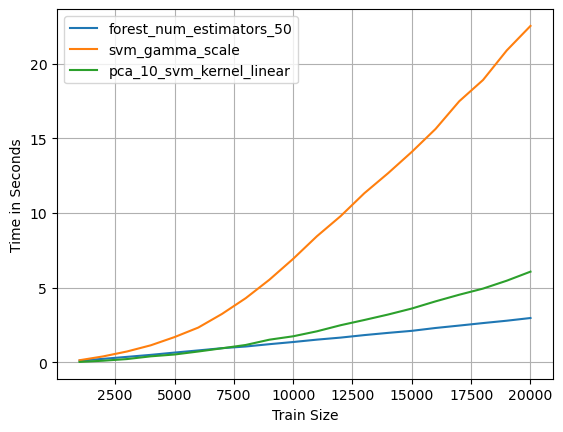

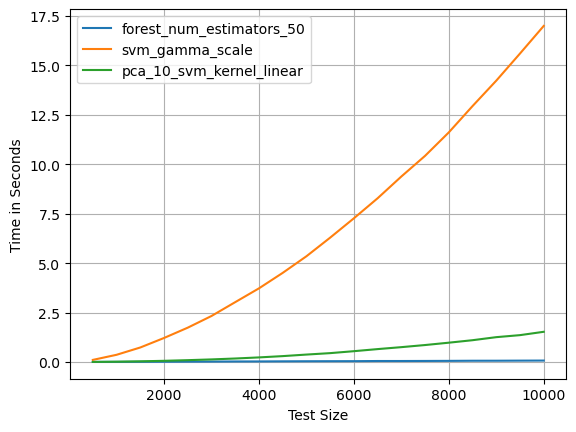

In [146]:
plot_acc_time(best_estimator_each_class, 'best_estimator_each_class')